# Definition of models

We consider a graph colouring problem including three colours corresponding respectively to :
* 0 : None edge
* 1 : intra-organisational edge
* 2 : inter-organisational edge

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from statsmodels.graphics.tsaplots import plot_acf
from math import exp

In [29]:
def print_config(data):
        if not isinstance(data, list):
            for k, v in data.items():
                if k != 'posteriors':
                    print("{} => {}".format(k, v))
                    

def extract_strauss_inter_from_file(path):
    with open(path, 'r') as input_file:
        data = json.load(input_file)
    if not isinstance(data, list):
        print_config(data)
        data = data['posteriors']
    beta_01 = [d[0] for d in data]
    beta_02 = [d[1] for d in data]
    beta_12 = [d[2] for d in data]

    
    data_frame = pd.DataFrame({'beta_01': beta_01,
                               'beta_02': beta_02,
                               'beta_12': beta_12})
    
    return data_frame


def summary(data):
    col_names = data.columns.values
    for i in [25,50,75]:
        print("========== Q{} ==========".format(i))
        for _, param_name in np.ndenumerate(col_names):
            q = np.percentile(data[param_name], i)
            print("Q{} for {} parameter {}".format(i, param_name, q))
    
    
def plot_marginals(data_abc, perfect_vals, burn_in=0, by=1):
    
    col_names = data_abc.columns.values
    
    fig, axs = plt.subplots(len(col_names), 2, figsize=(14,7*len(col_names)))
    
    for idx, param_name in np.ndenumerate(col_names):
        i = idx[0]
        # Sample parameter
        params = data_abc[param_name].tolist()[burn_in::by]

        # Distribution
        sns.distplot(params, axlabel="{} distribution ABC".format(param_name), ax=axs[i, 0])
        axs[i, 0].axvline(perfect_vals[i], color='r', linestyle='--', label='expected value')

        # Path
        axs[i, 1].plot(range(len(params)), params)
        axs[i, 1].axhline(perfect_vals[i], color='r', linestyle='--', label='expected value')
        axs[i, 1].set(xlabel='iterations', ylabel='{} parameter ABC'.format(param_name))


def autocor(data_abc, burn_in=0, by=1):

    col_names = data_abc.columns.values
    fig, axs = plt.subplots(len(col_names), 1, sharex='col', sharey='row', figsize=(14,21)) 
    
    for idx, param_name in np.ndenumerate(col_names):
        i = idx[0]
        params = data_abc[param_name].tolist()[burn_in::by]
    
        plot_acf(params, ax=axs[i])
        axs[i].set_title("Autocorrelation for {} parameter".format(param_name))

## Pott model with interactions

$$U(y) = \beta_{01} \sum_{i \sim j} \mathbb{1}\{y_i = 0, y_j =1\} + \beta_{02} \sum_{i \sim j} \mathbb{1}\{y_i = 0, y_j=2\} + \beta_{12} \sum_{i \sim j} \mathbb{1}\{y_i = 1, y_j = 2\}$$


In [9]:
FILE_NAME_STRAUSS_INTER = 'assets/strauss_inter2.json'
data_strauss_inter = extract_strauss_inter_from_file(FILE_NAME_STRAUSS_INTER)

algo => abc_shadow
model => strauss_inter_graph
theta0 => [0.5, -0.1, 0.5]
theta_perf => [0.5, -0.1, 0.5]
iters => 500000
n => 200
delta => [0.01, 0.01, 0.01]
y_obs => [97.31631631631632, 41.18018018018018, 98.13513513513513]


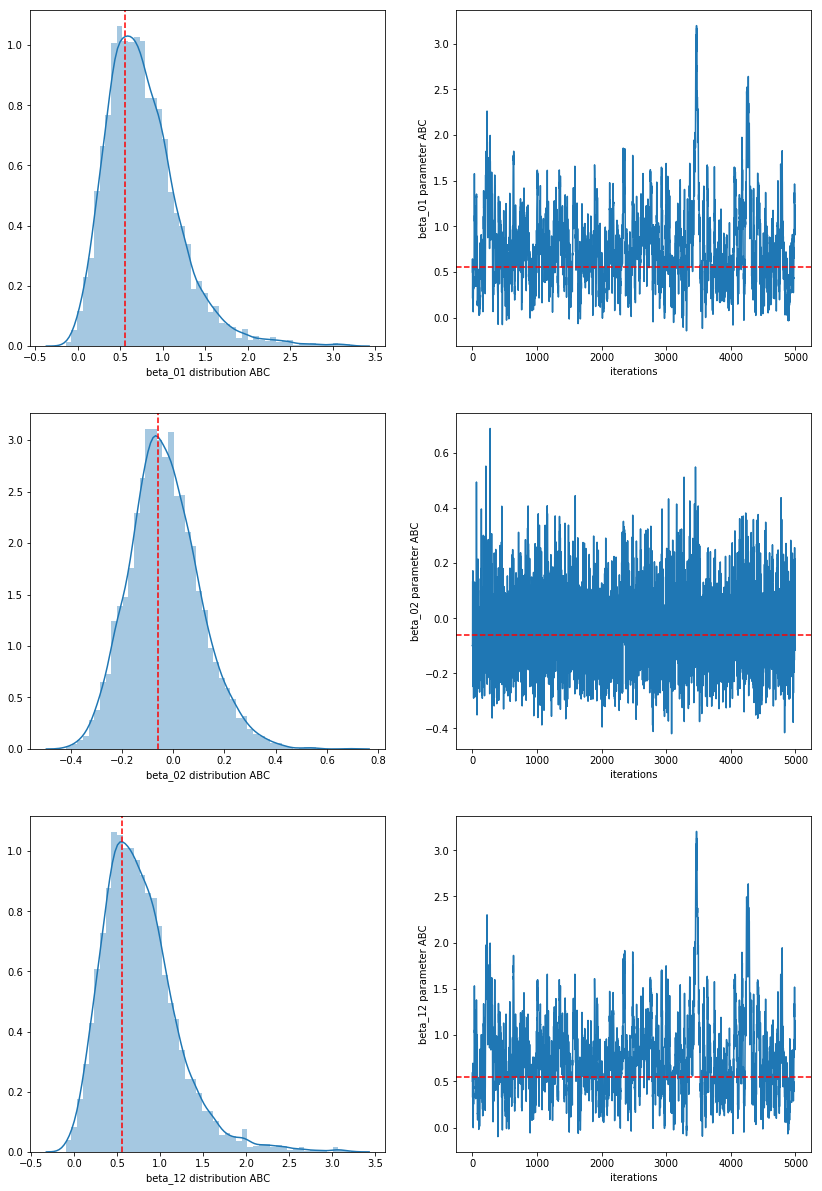

In [30]:
plot_marginals(data_strauss_inter, [0.55, -0.06, 0.55], by=100)

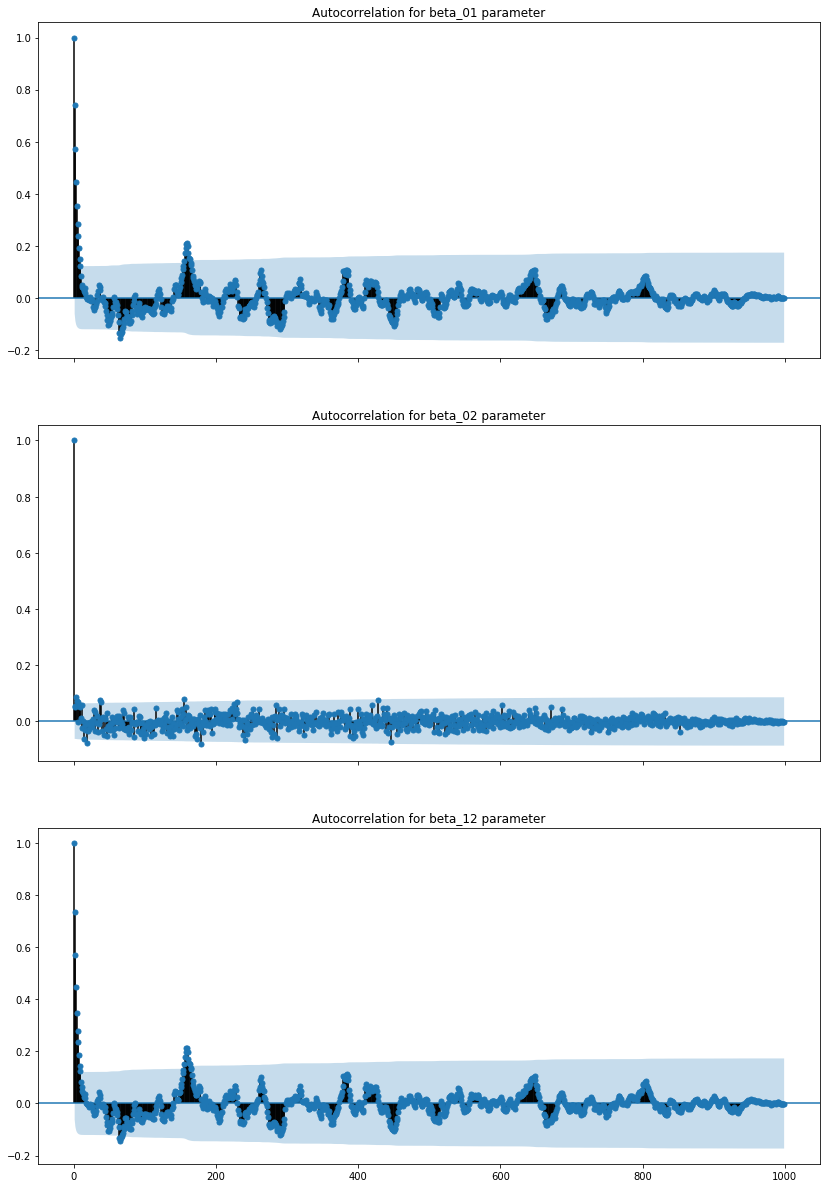

In [21]:
autocor(data_strauss_inter, by=500)